In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Try reading the file with a different encoding, like 'latin-1' or 'cp1252'
df = pd.read_csv('/content/drive/MyDrive/CIS509- Files/business_az_final (2).csv')
# If 'latin-1' doesn't work, try 'cp1252', 'utf-16', or other encodings.

df.head()



,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,126,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741.0,32.338572,-111.010760,4.0,22,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",NaN
1,132,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711.0,32.206315,-110.887843,3.5,56,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
2,234,Y6heWJJ9AmEL58fZwgi9YQ,Rosati's Pizza,2944 W Ina Rd,Tucson,AZ,85741.0,32.338724,-111.030310,4.0,58,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Sports Bars, Bars, Nightlife, Italian, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ..."
3,319,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719.0,32.250960,-110.959158,4.0,446,1,"{'RestaurantsAttire': ""'casual'"", 'BusinessAcc...","Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
4,457,D7z_V6E8cxXghSRcHAmUPg,La Bella China Restaurant,5680 S 12th Ave,Tucson,AZ,85706.0,32.149473,-110.978186,4.0,92,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Chinese","{'Tuesday': '11:0-19:30', 'Wednesday': '11:0-1..."


In [ ]:
# Drop rows that have NaN in 'categories' to avoid errors
df = df.dropna(subset=['categories'])

# Split categories and aggregate into a list
all_categories = []
for cat_list_str in df['categories']:
    cat_list = cat_list_str.split(',')
    cat_list = [c.strip() for c in cat_list]  # strip extra spaces
    all_categories.extend(cat_list)

# Put all categories into a DataFrame for counting
cat_df = pd.DataFrame(all_categories, columns=['category'])

# Check a few rows
print(cat_df.head(10))


      category
0        Pizza
1  Restaurants
2         Bars
3  Restaurants
4  Sports Bars
5    Nightlife
6  Sports Bars
7         Bars
8    Nightlife
9      Italian


In [ ]:
cat_counts = cat_df['category'].value_counts()
print(cat_counts.head(20))  # Show top 20 categories


category
Restaurants                  1639
Food                          542
Fast Food                     403
Mexican                       342
Sandwiches                    269
Nightlife                     255
Bars                          248
Burgers                       237
Breakfast & Brunch            234
American (Traditional)        228
Pizza                         183
American (New)                164
Coffee & Tea                  118
Chicken Wings                 104
Italian                        97
Event Planning & Services      95
Chinese                        90
Salad                          90
Desserts                       80
Cafes                          79
Name: count, dtype: int64


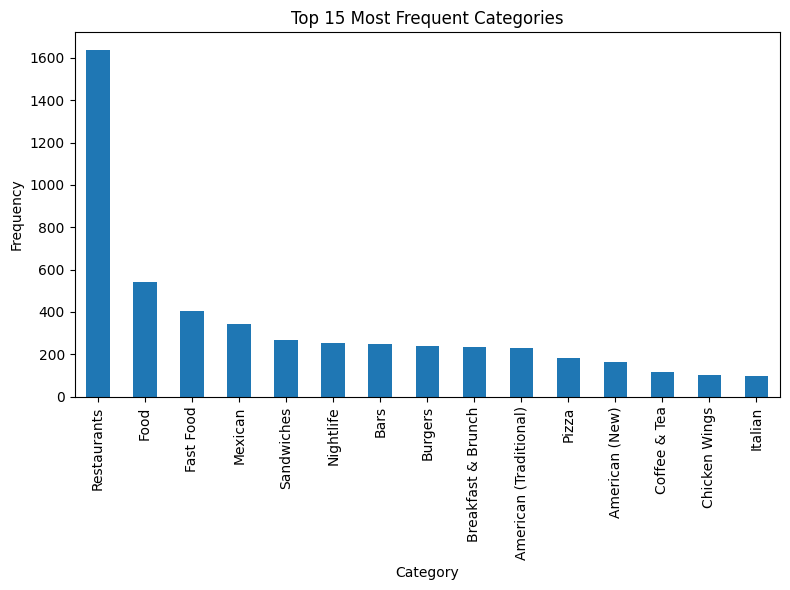

In [ ]:
import matplotlib.pyplot as plt

top_n = 15  # how many categories to display
top_categories = cat_counts.head(top_n)

plt.figure(figsize=(8,6))
top_categories.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Categories')
plt.tight_layout()
plt.show()


In [ ]:
pip install wordcloud

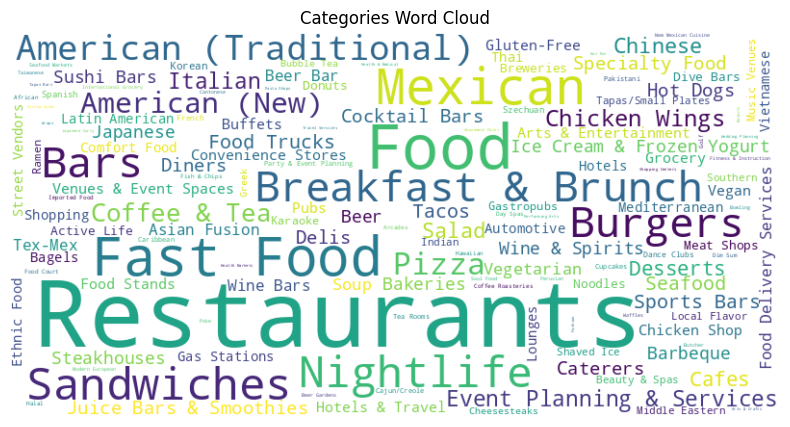

In [ ]:
from wordcloud import WordCloud

# Generate a dictionary of {category: frequency} for the word cloud
cat_freq_dict = dict(cat_counts)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(cat_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Categories Word Cloud")
plt.show()

In [ ]:
pip install transformers

In [ ]:
from transformers import logging

logging.set_verbosity_error()
from transformers import pipeline

# 1. Create a zero-shot pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

# 2. Define the broad meta-categories (customize as you wish)
candidate_labels = [
    "Fast Food", "Casual Dining", "Fine Dining",
    "Bars & Nightlife", "Cafes & Coffee Shops", "Bakeries & Desserts",
    "Healthy & Organic", "Seafood", "Steakhouses", "Vegan & Vegetarian",
    "International Cuisine", "Retail & Shopping", "Entertainment",
    "Health & Wellness", "Breakfast & Brunch", "Takeout & Delivery"

]

# 3. Sample some categories from your top counts
sample_cats = cat_counts.head(10).index.tolist()

# 4. Run zero-shot classification on each
print("Zero-Shot Classification Results\n---------------------------------")
for cat in sample_cats:
    result = classifier(cat, candidate_labels)
    top_label = result["labels"][0]
    top_score = result["scores"][0]
    print(f"Category: {cat}\n  Predicted label: {top_label} (score={top_score:.4f})\n")

Zero-Shot Classification Results
---------------------------------
Category: Restaurants
  Predicted label: Fine Dining (score=0.4496)

Category: Food
  Predicted label: Fine Dining (score=0.1784)

Category: Fast Food
  Predicted label: Fast Food (score=0.7645)

Category: Mexican
  Predicted label: International Cuisine (score=0.6513)

Category: Sandwiches
  Predicted label: Casual Dining (score=0.3890)

Category: Nightlife
  Predicted label: Entertainment (score=0.4856)

Category: Bars
  Predicted label: Bars & Nightlife (score=0.3344)

Category: Burgers
  Predicted label: Fast Food (score=0.8720)

Category: Breakfast & Brunch
  Predicted label: Breakfast & Brunch (score=0.4894)

Category: American (Traditional)
  Predicted label: Cafes & Coffee Shops (score=0.1434)



In [ ]:
from google.colab import files
import pandas as pd

# Assuming 'classifier', 'sample_cats', and 'candidate_labels' are defined from the previous cell
results = []
for cat in sample_cats:
    result = classifier(cat, candidate_labels)
    results.append({'category': cat,
                    'predicted_label': result["labels"][0],
                    'score': result["scores"][0]})

df_results = pd.DataFrame(results)  # Create the DataFrame

df_results.to_csv("zero_shot_classified_categories.csv", index=False)
files.download("zero_shot_classified_categories.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Merge Topics + Category with Business Metadata

In [ ]:
import pandas as pd

# Read Business Metadata (with encoding handling)
business_df = pd.read_csv("/content/drive/MyDrive/CIS509- Files/business_az_final (2).csv", encoding="latin-1")

# Read Zero-Shot Classified Categories
categories_df = pd.read_csv("/content/zero_shot_classified_categories.csv", encoding="latin-1")

# Read BERTopic Topic Modeling Data
topics_df = pd.read_csv("/content/drive/MyDrive/CIS509- Files/bertopic_reviews.csv", encoding="latin-1")

# Display the first few rows to verify correct loading
print("Business Metadata:")
display(business_df.head())

print("\nClassified Categories:")
display(categories_df.head())

print("\nTopic Modeling Data:")
display(topics_df.head())


Business Metadata:


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,126,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741.0,32.338572,-111.010760,4.0,22,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",NaN
1,132,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711.0,32.206315,-110.887843,3.5,56,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
2,234,Y6heWJJ9AmEL58fZwgi9YQ,Rosati's Pizza,2944 W Ina Rd,Tucson,AZ,85741.0,32.338724,-111.030310,4.0,58,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Sports Bars, Bars, Nightlife, Italian, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ..."
3,319,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719.0,32.250960,-110.959158,4.0,446,1,"{'RestaurantsAttire': ""'casual'"", 'BusinessAcc...","Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
4,457,D7z_V6E8cxXghSRcHAmUPg,La Bella China Restaurant,5680 S 12th Ave,Tucson,AZ,85706.0,32.149473,-110.978186,4.0,92,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Chinese","{'Tuesday': '11:0-19:30', 'Wednesday': '11:0-1..."



Classified Categories:


,category,predicted_label,score
0,Restaurants,Fine Dining,0.449585
1,Food,Fine Dining,0.178393
2,Fast Food,Fast Food,0.764450
3,Mexican,International Cuisine,0.651339
4,Sandwiches,Casual Dining,0.388967



Topic Modeling Data:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,clean_text,clean_text_len,topic
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",2020-01-27 22:59:06,ok hype hatch chili burger overrate ok like ki...,71,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,2020-04-19 05:33:16,pandemic pit stop ice cream plain Sundae Limit...,37,0
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2020-02-29 19:43:44,lucky enough soft opening let tell good beer w...,29,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,2020-03-14 21:47:07,claim Jumpers US never disappoint location dif...,28,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",2020-01-17 20:32:57,Maynard kitchen time hope dinner sure reservat...,53,1


### Merge the output csvs from topic modelling and category extraction with Business Metadata.

In [ ]:
import os
from google.colab import files
import pandas as pd

# Merge Business Data with Classified Categories
merged_df = business_df.merge(categories_df, left_on="categories", right_on="category", how="left")

# Drop redundant 'category' column from the classified dataset
merged_df = merged_df.drop(columns=['category'])

# Merge with BERTopic Data (on business_id)
final_df = merged_df.merge(topics_df[['business_id', 'topic']], on='business_id', how='left')


# Save the merged dataset to the /content directory
final_df.to_csv("/content/merged_restaurant_data.csv", index=False)

# Initiate the download
files.download("/content/merged_restaurant_data.csv")








<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>